# Figure S4. Hyperparameter sensitivity and robustness analysis for ColocBoost.

Performances of ColocBoost with different hyperparameters are evaluated under the simulation designs involving 2, 5, and 10 traits, up to five causal variants per trait per locus, with genotype data and induced colocalization configurations designed to mimic real xQTL datasets.

- **S4a**. Simulation studies to benchmark different choice of probabilistic simplex $\delta^k$ used in proximity smoothing in ColocBoost.
- **S4b**. Sensitivity analysis of $\lambda \in [0,1]$ that controls the strength of proximity smoothing in ColocBoost.
- **S4c**. Sensitivity analysis of threshold to determine the equivalence across best updates.
- **S4d,e**. Sensitivity of two parameters related to D-SEC, code-named `coloc_thresh` and `func_compare`.
- **S4f**. Evaluation of performance for different weight fudge factor $\nu$.
- **S4g,h**. Robustness against weak spurious signals removing criterions.
- **S4i**. Robustness of correlation between confidence sets.
  
See detailed definitions of each parameters in Supplementary Note S.5.2.

## Figure S4a
Simulation studies to benchmark different choice of probabilistic simplex $\delta^k$ used in proximity smoothing in ColocBoost.

In [21]:
library(ggplot2)
library(ggpattern)
library(ggpubr)
library(cowplot)
sumstat = readRDS("Figure_S4a.rds")
p1 = sumstat %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "simplex") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = sumstat %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "simplex") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )


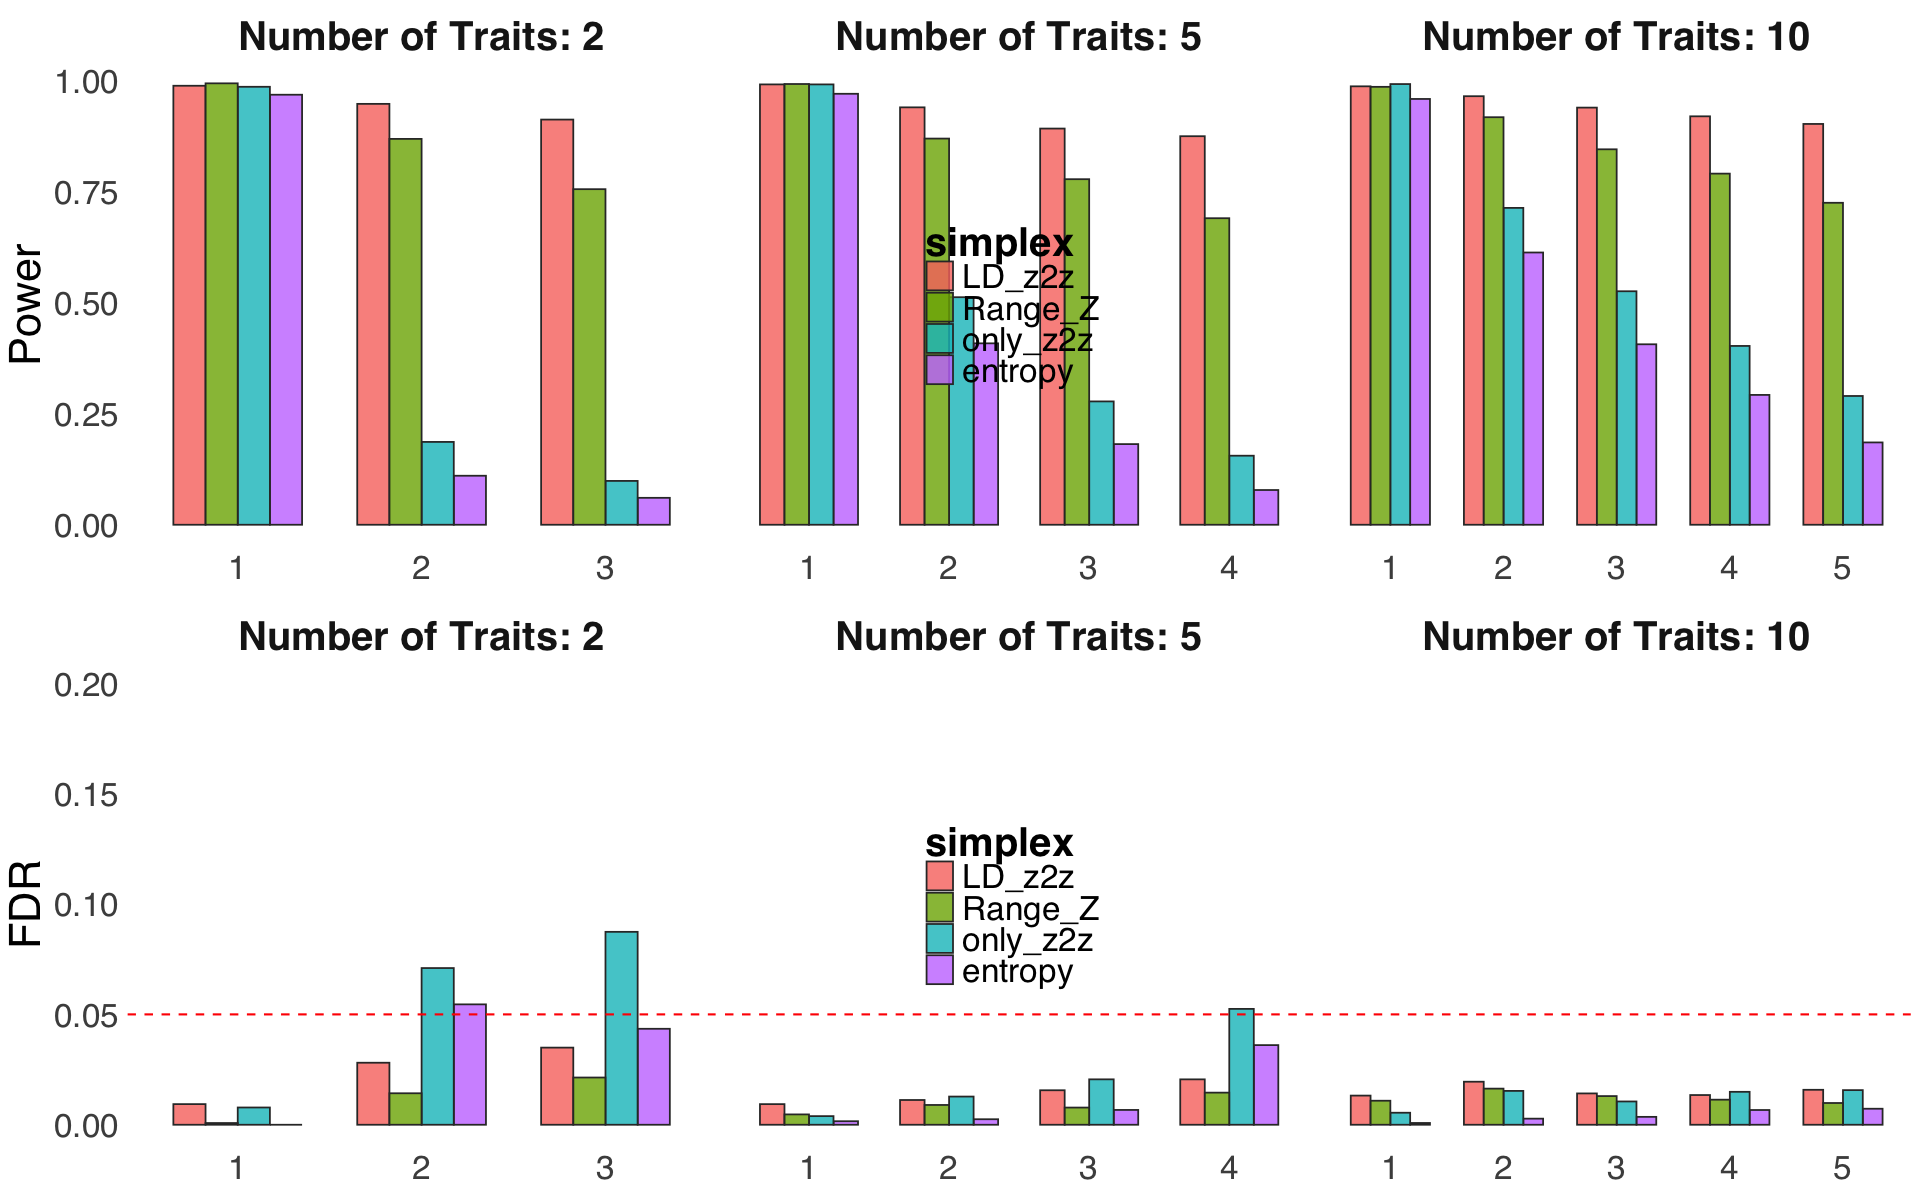

In [22]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S4b
Sensitivity analysis of $\lambda \in [0,1]$ that controls the strength of proximity smoothing in ColocBoost.

In [23]:
library(ggplot2)
ratio = readRDS("Figure_S4b.rds")
p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "lambda") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "lambda") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

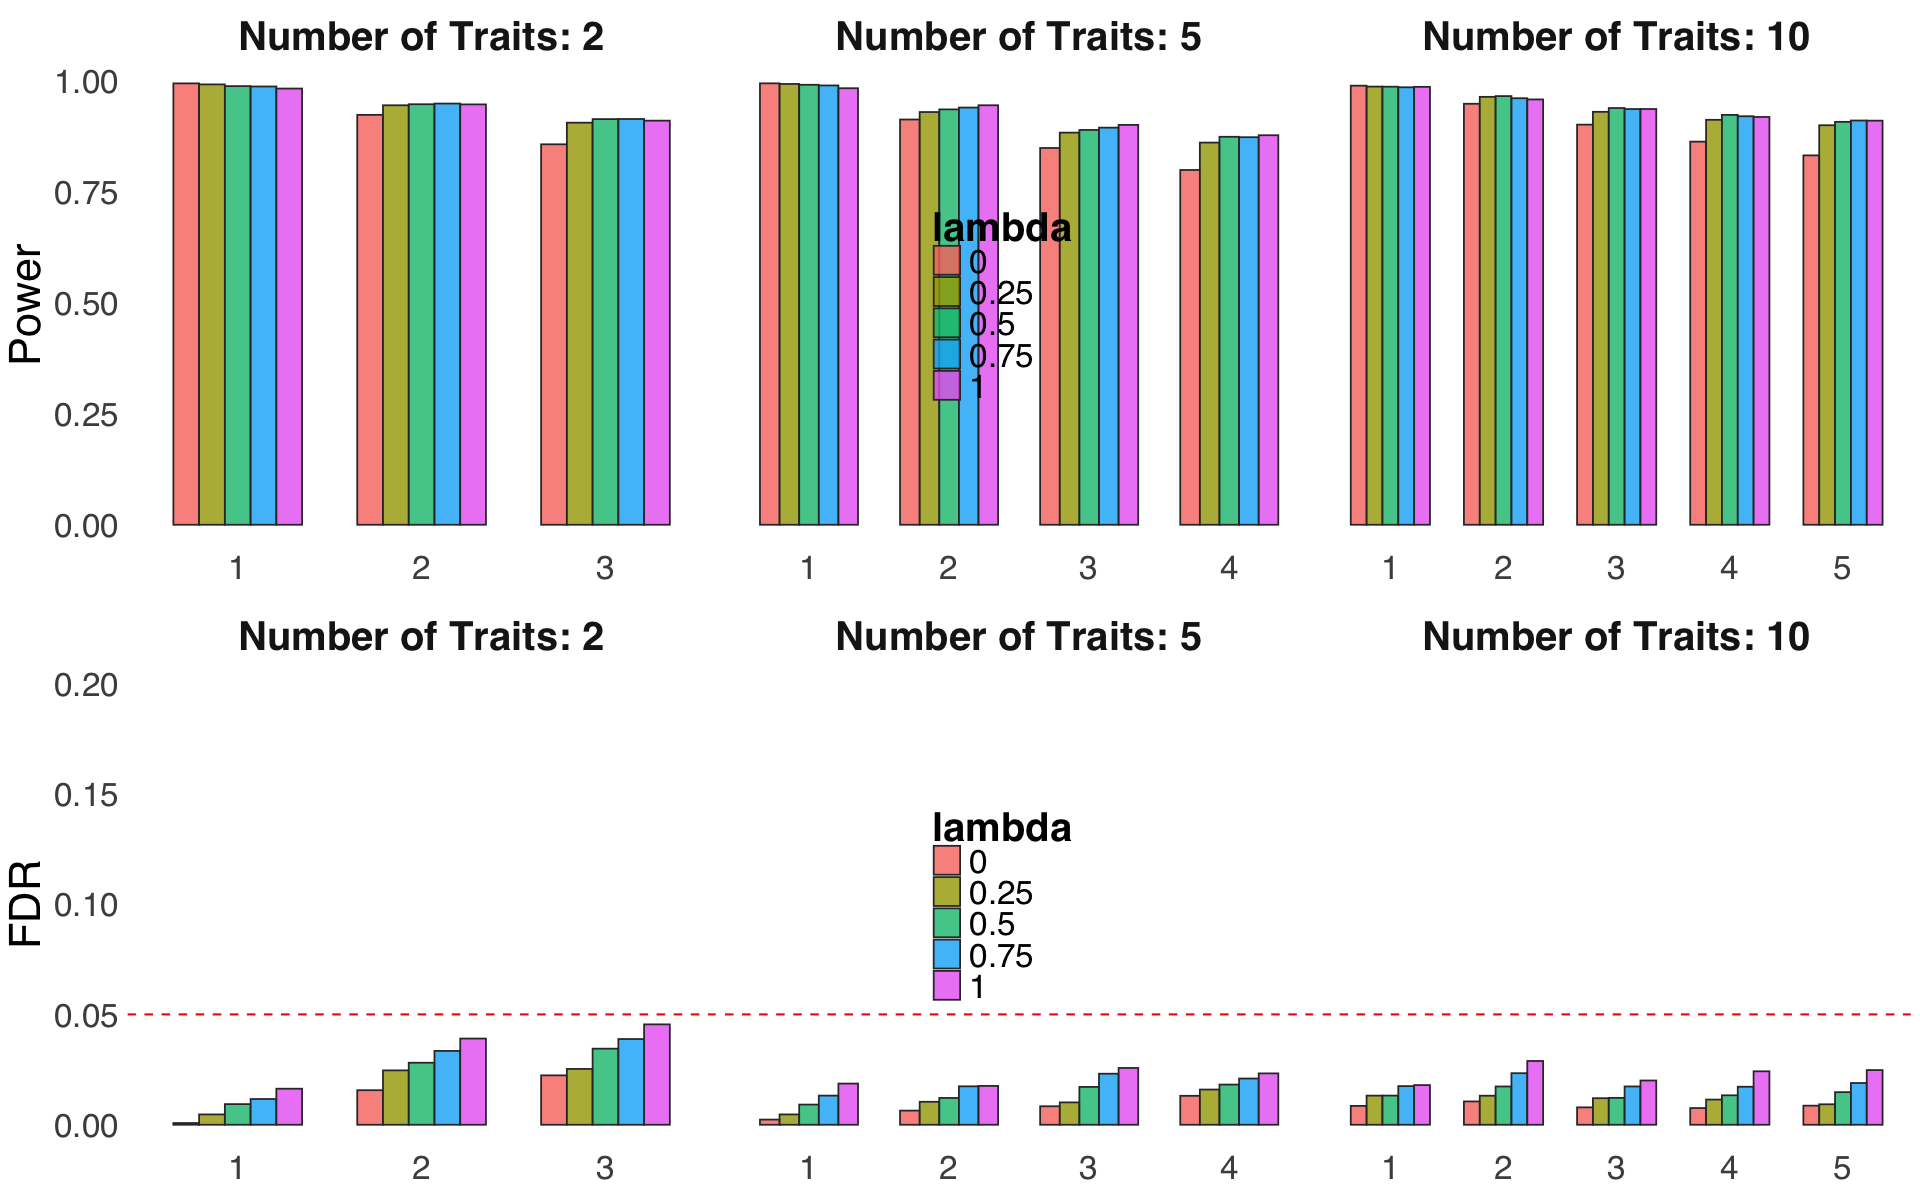

In [24]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S4c
Sensitivity analysis of threshold to determine the equivalence across best updates.

In [25]:
ratio = readRDS("Figure_S4c.rds")
p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "threshold_idx") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "threshold_idx") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

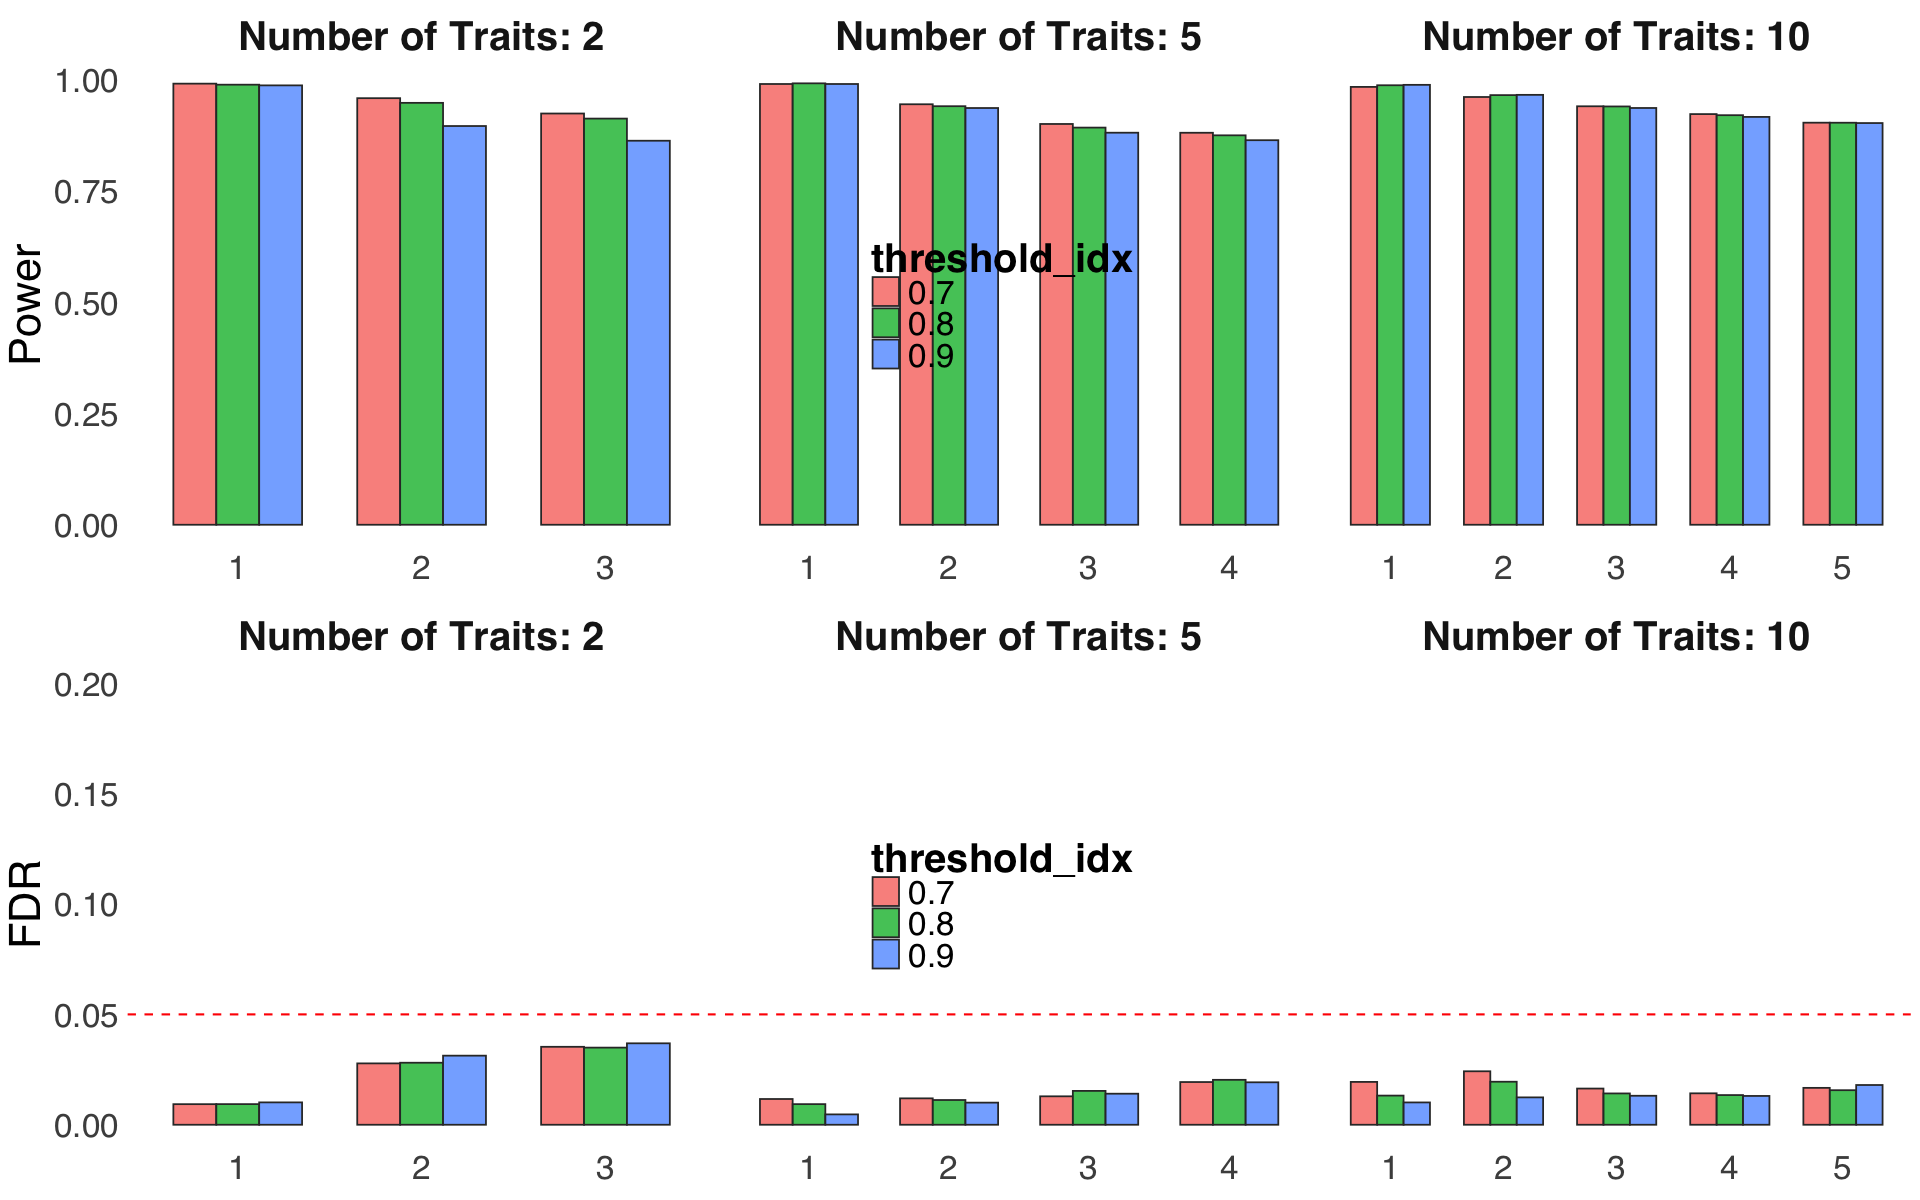

In [26]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S4d,e
Sensitivity of two parameters related to D-SEC, code-named `coloc_thresh` and `func_compare`.

In [27]:
ratio = readRDS("Figure_S4d.rds")

p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "coloc_thres") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "coloc_thres") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

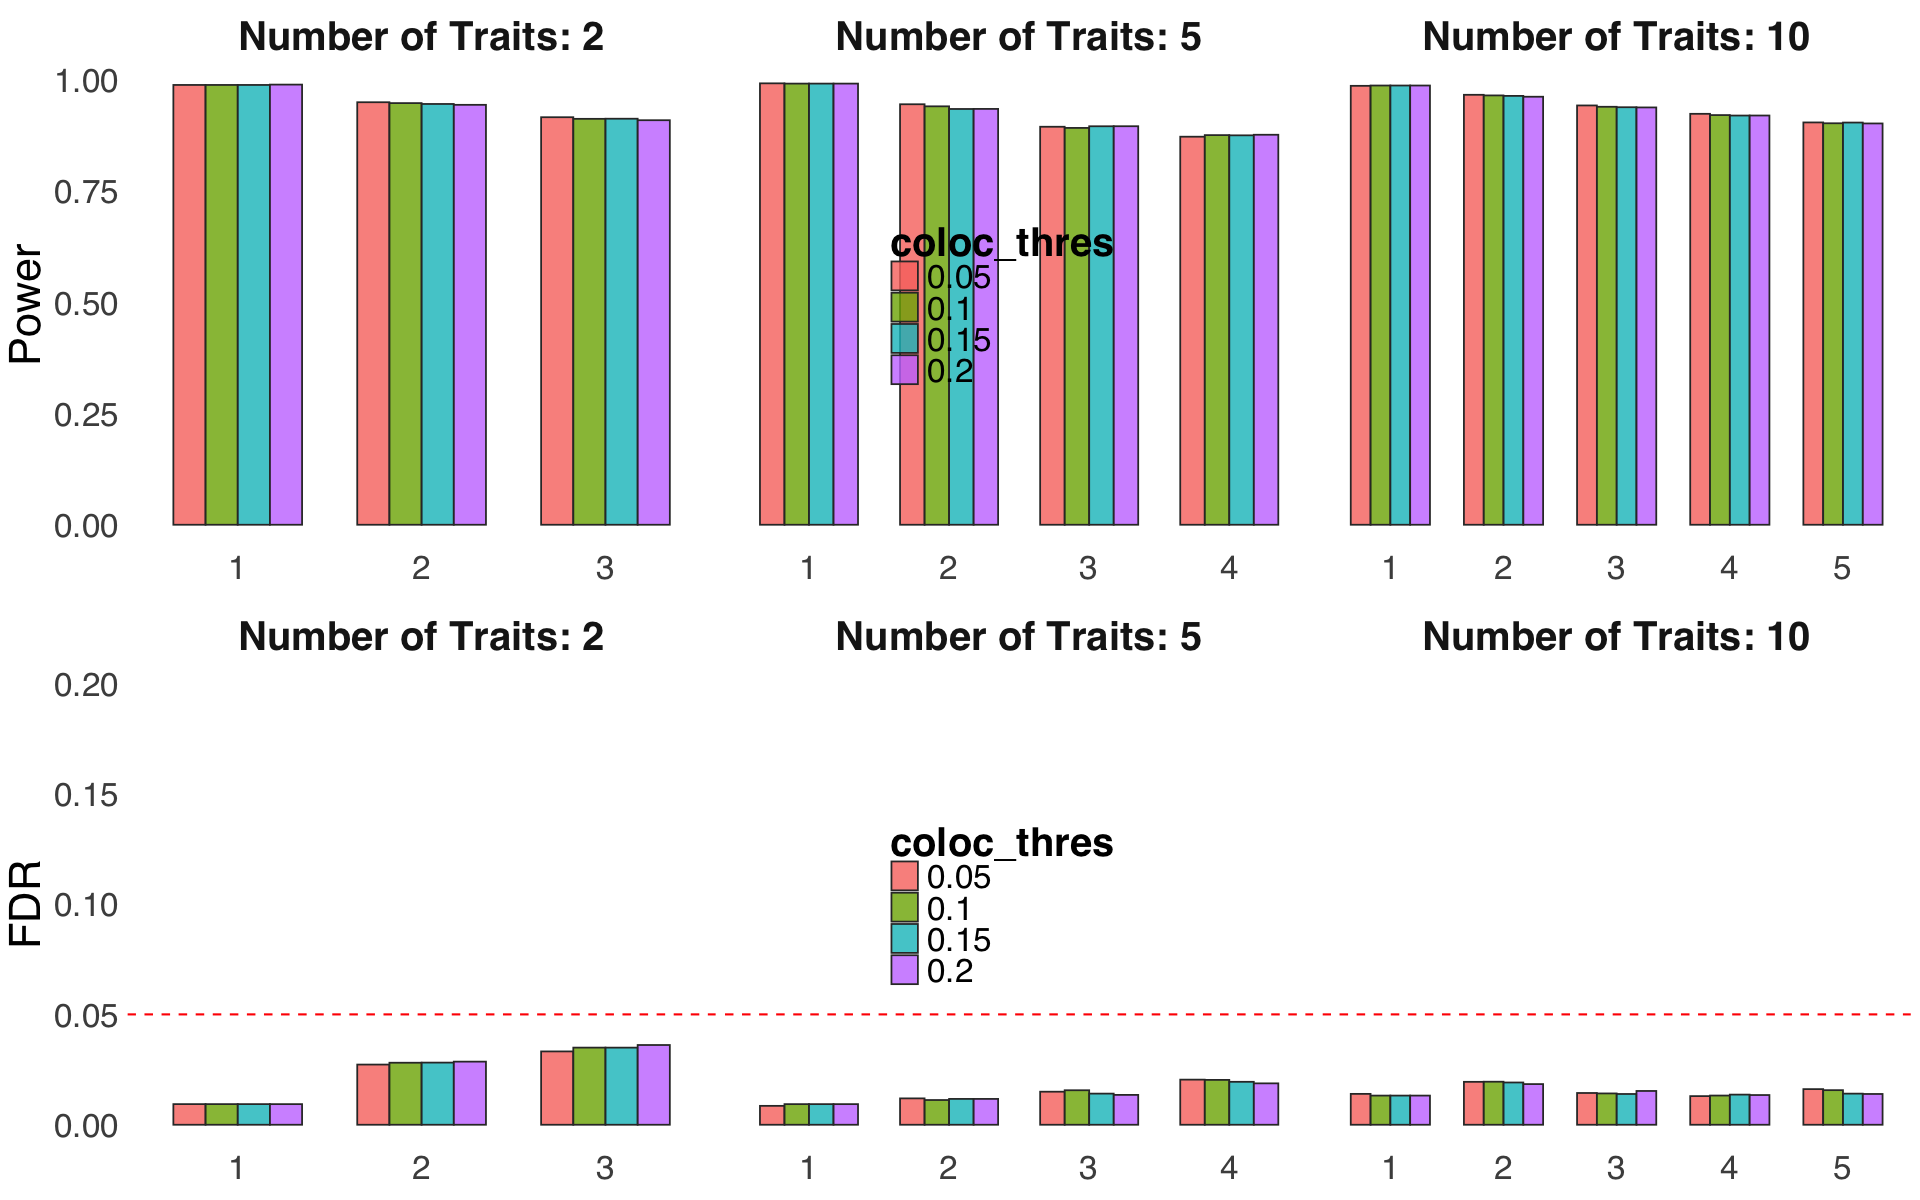

In [28]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

In [29]:
ratio = readRDS("Figure_S4e.rds")

p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "func_compare") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "func_compare") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

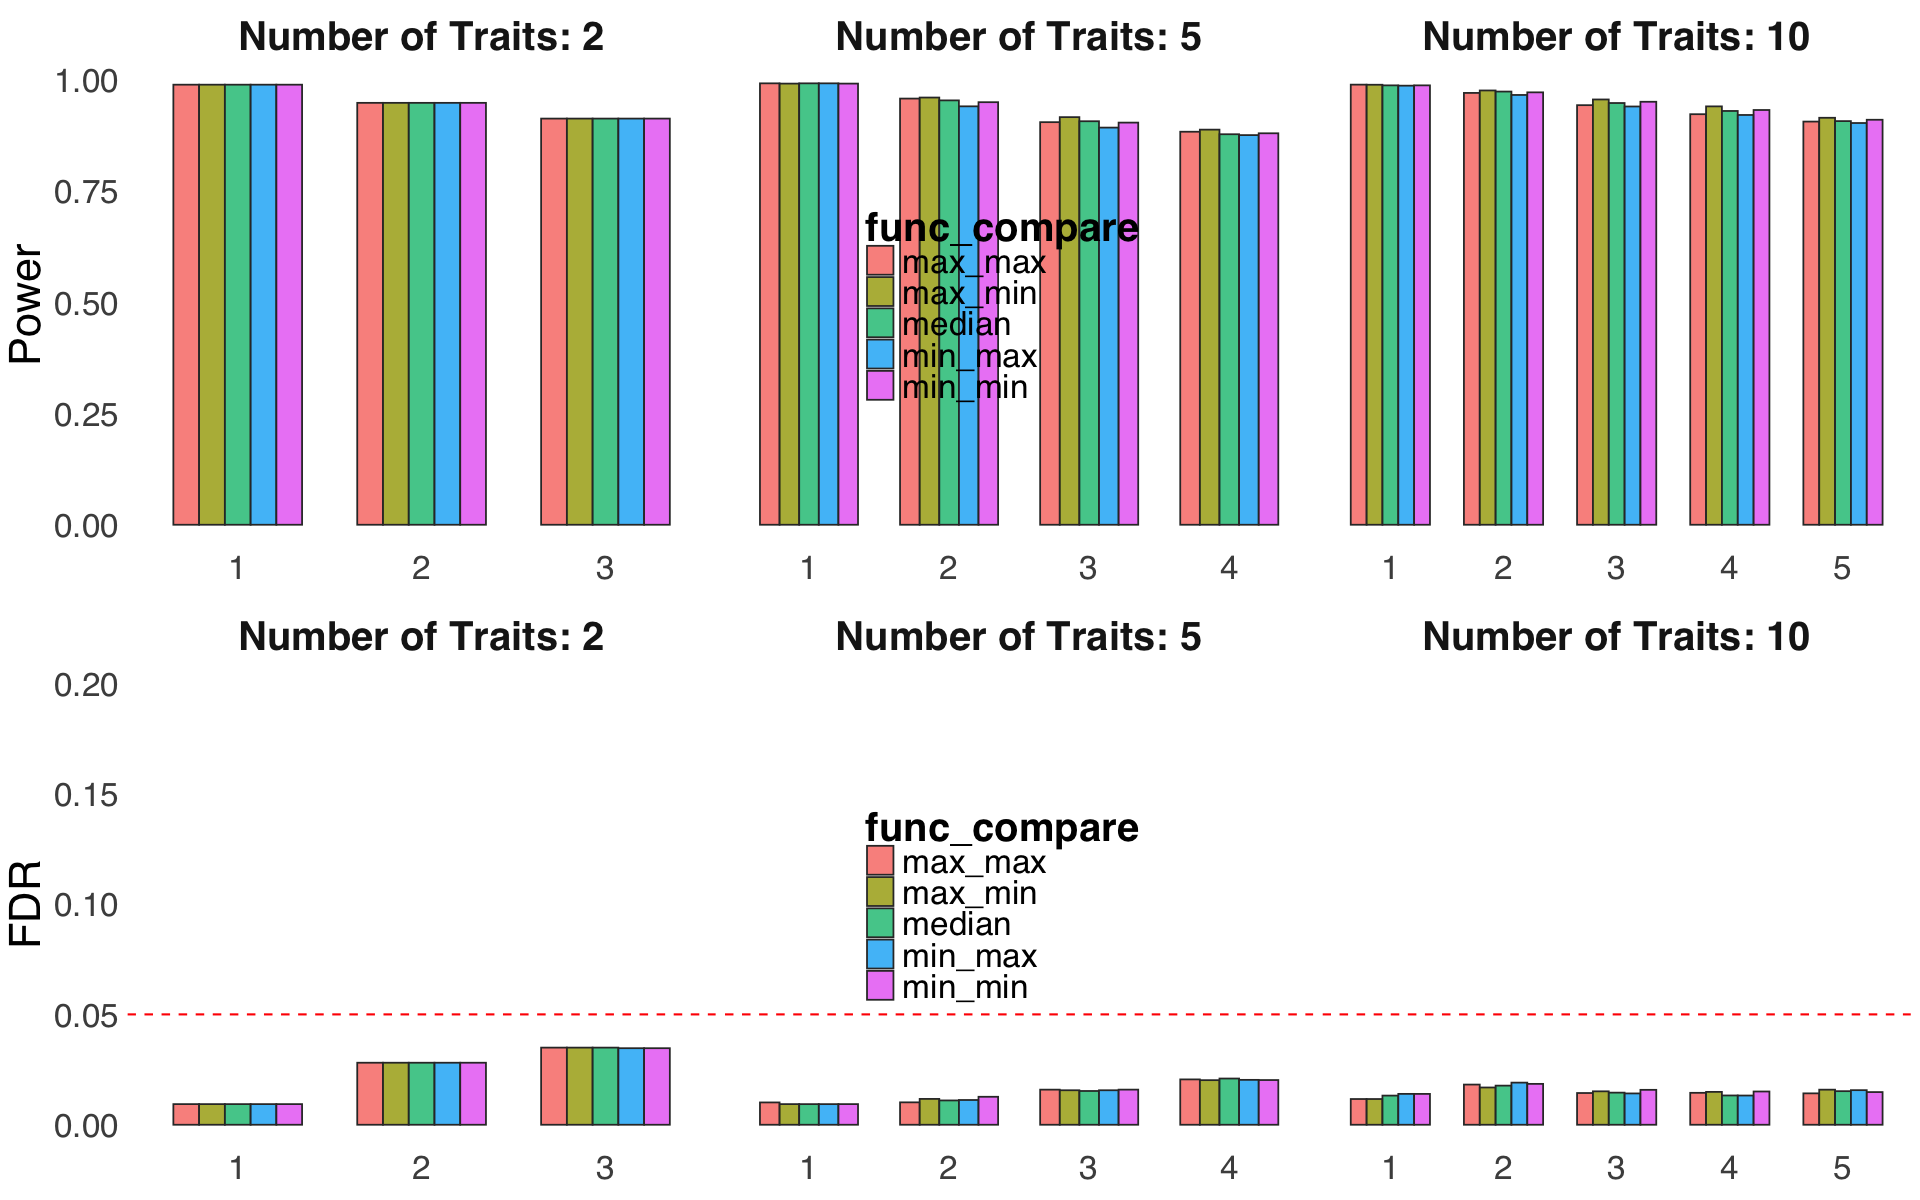

In [30]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S4f
Evaluation of performance for different weight fudge factor $\nu$.

In [34]:
ratio = readRDS("Figure_S4f.rds")

p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "weight fudge factor") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "weight fudge factor") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

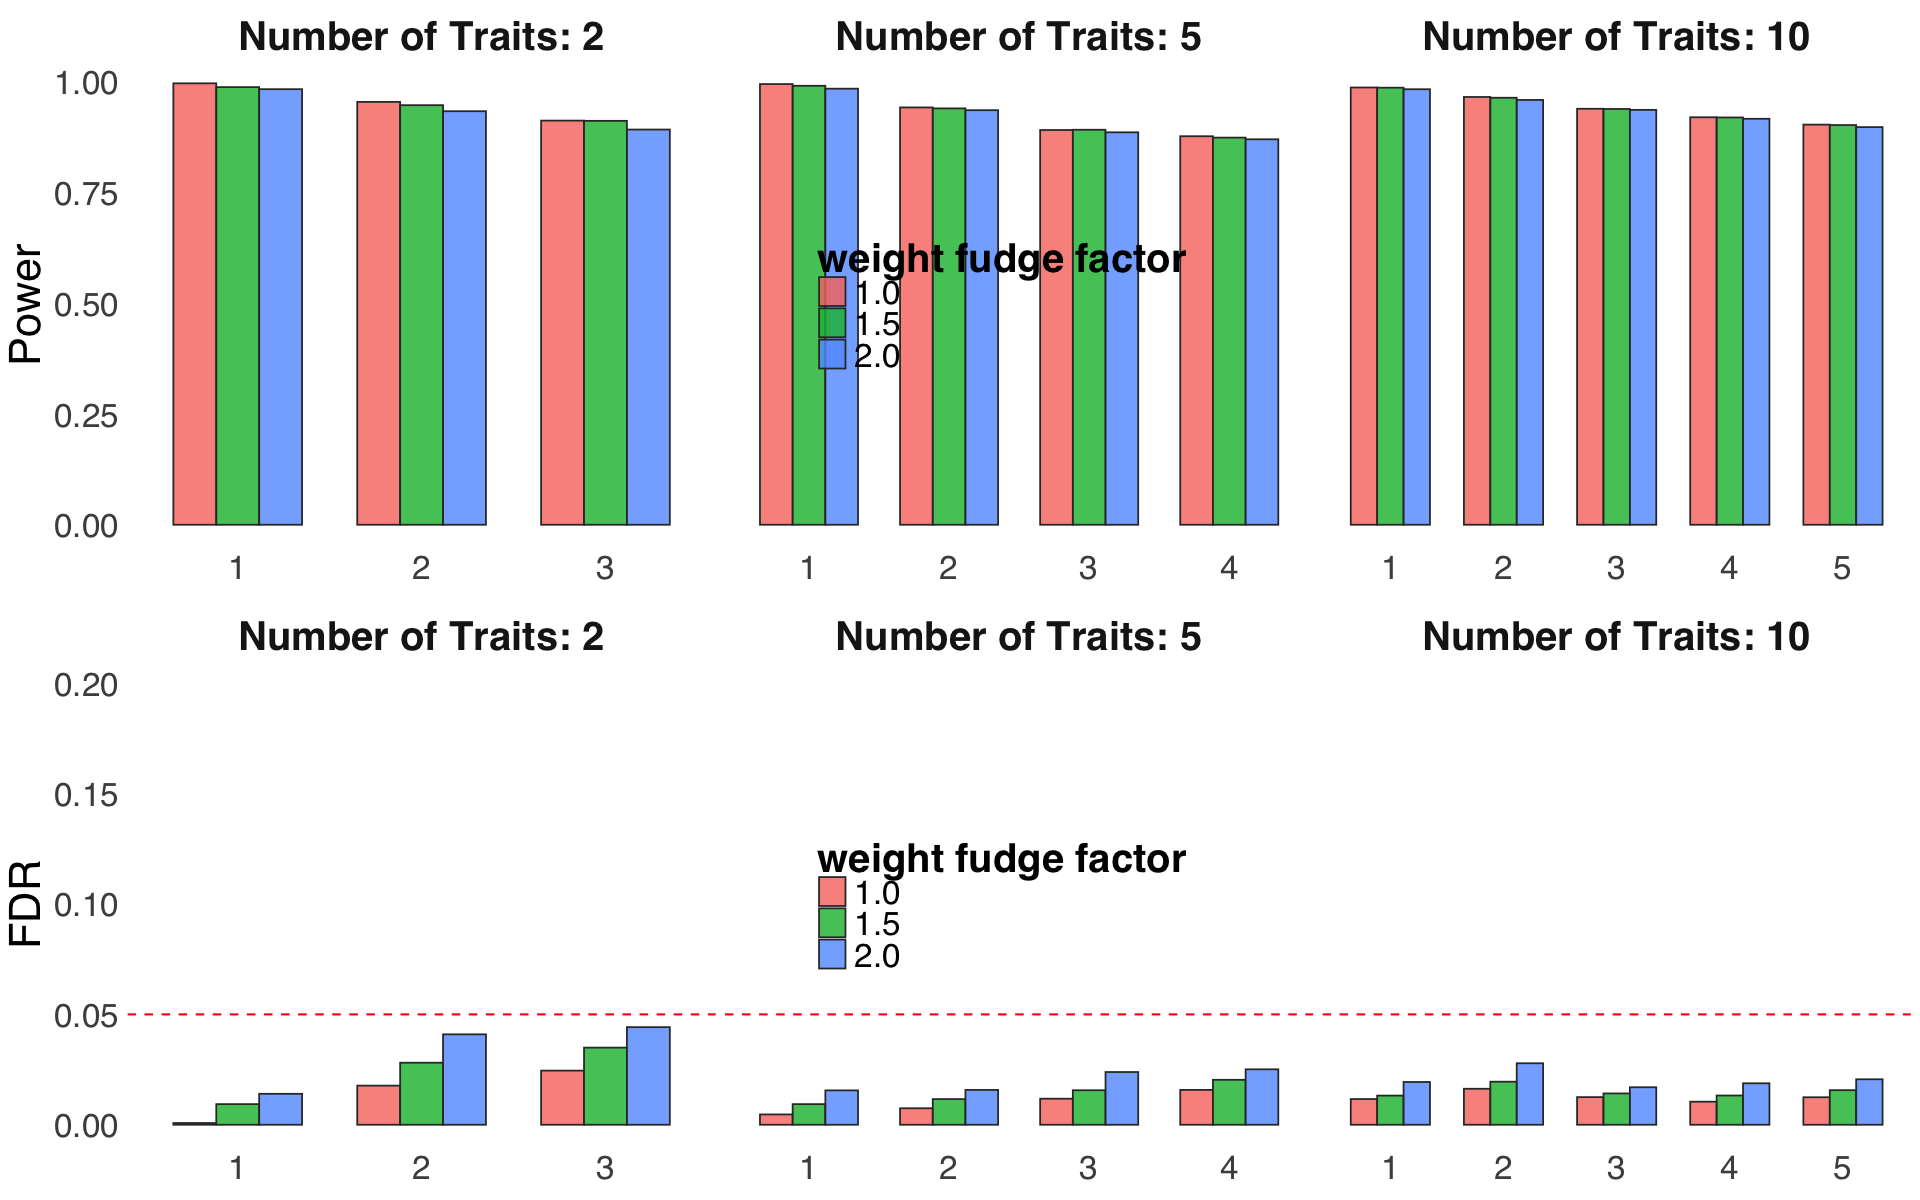

In [35]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S4g,h
Robustness against weak spurious signals removing criterions.

In [38]:
ratio = readRDS("Figure_S4g.rds")

p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "check_null") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "check_null") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

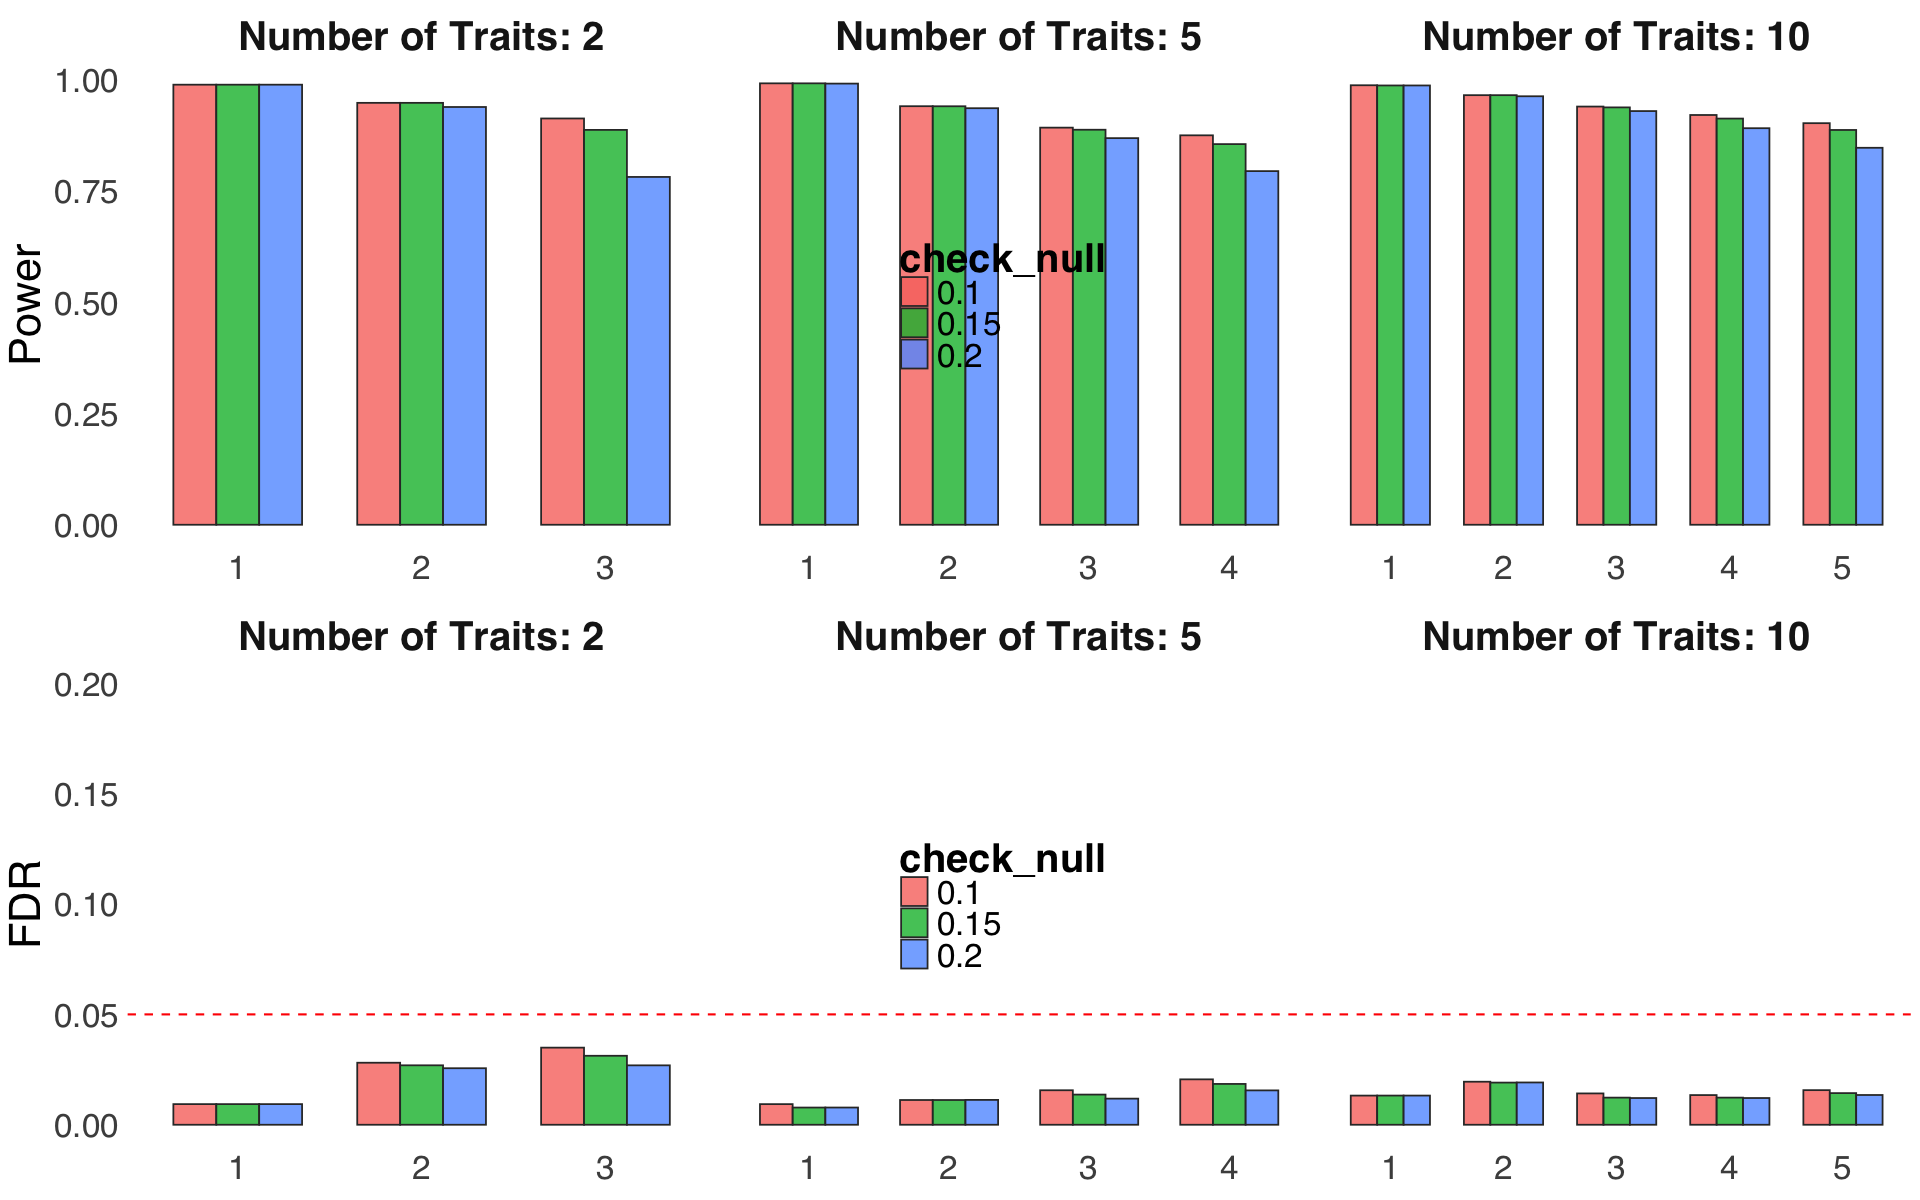

In [39]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

In [41]:
ratio = readRDS("Figure_S4h.rds")

p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "check_null_max") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "check_null_max") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

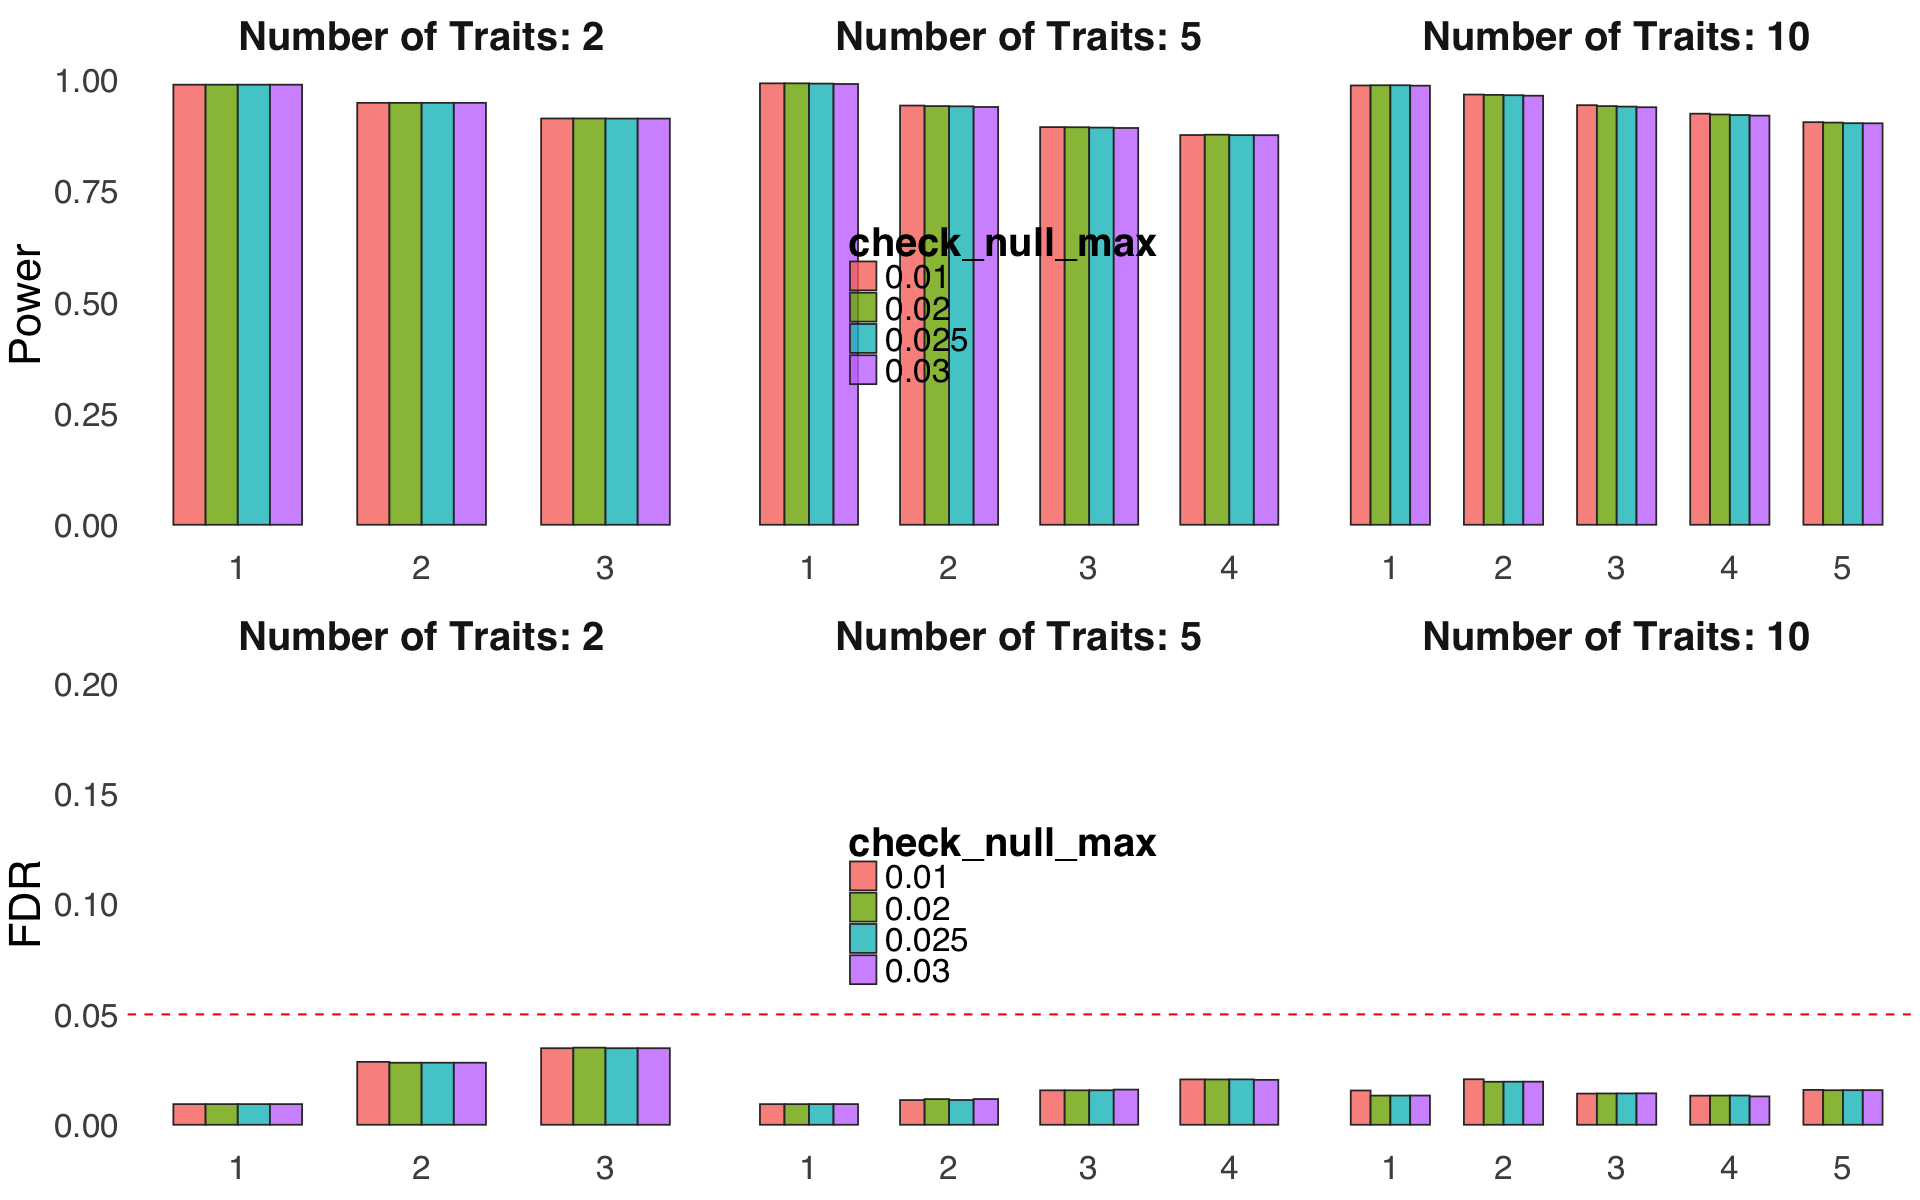

In [42]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S4i
Robustness of correlation between confidence sets.

In [43]:
ratio = readRDS("Figure_S4i.rds")

p1 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "Power", color = "Methods", fill = "between_purity") +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 = ratio %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Causal Variants Number", y = "FDR", color = "Methods", fill = "between_purity") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

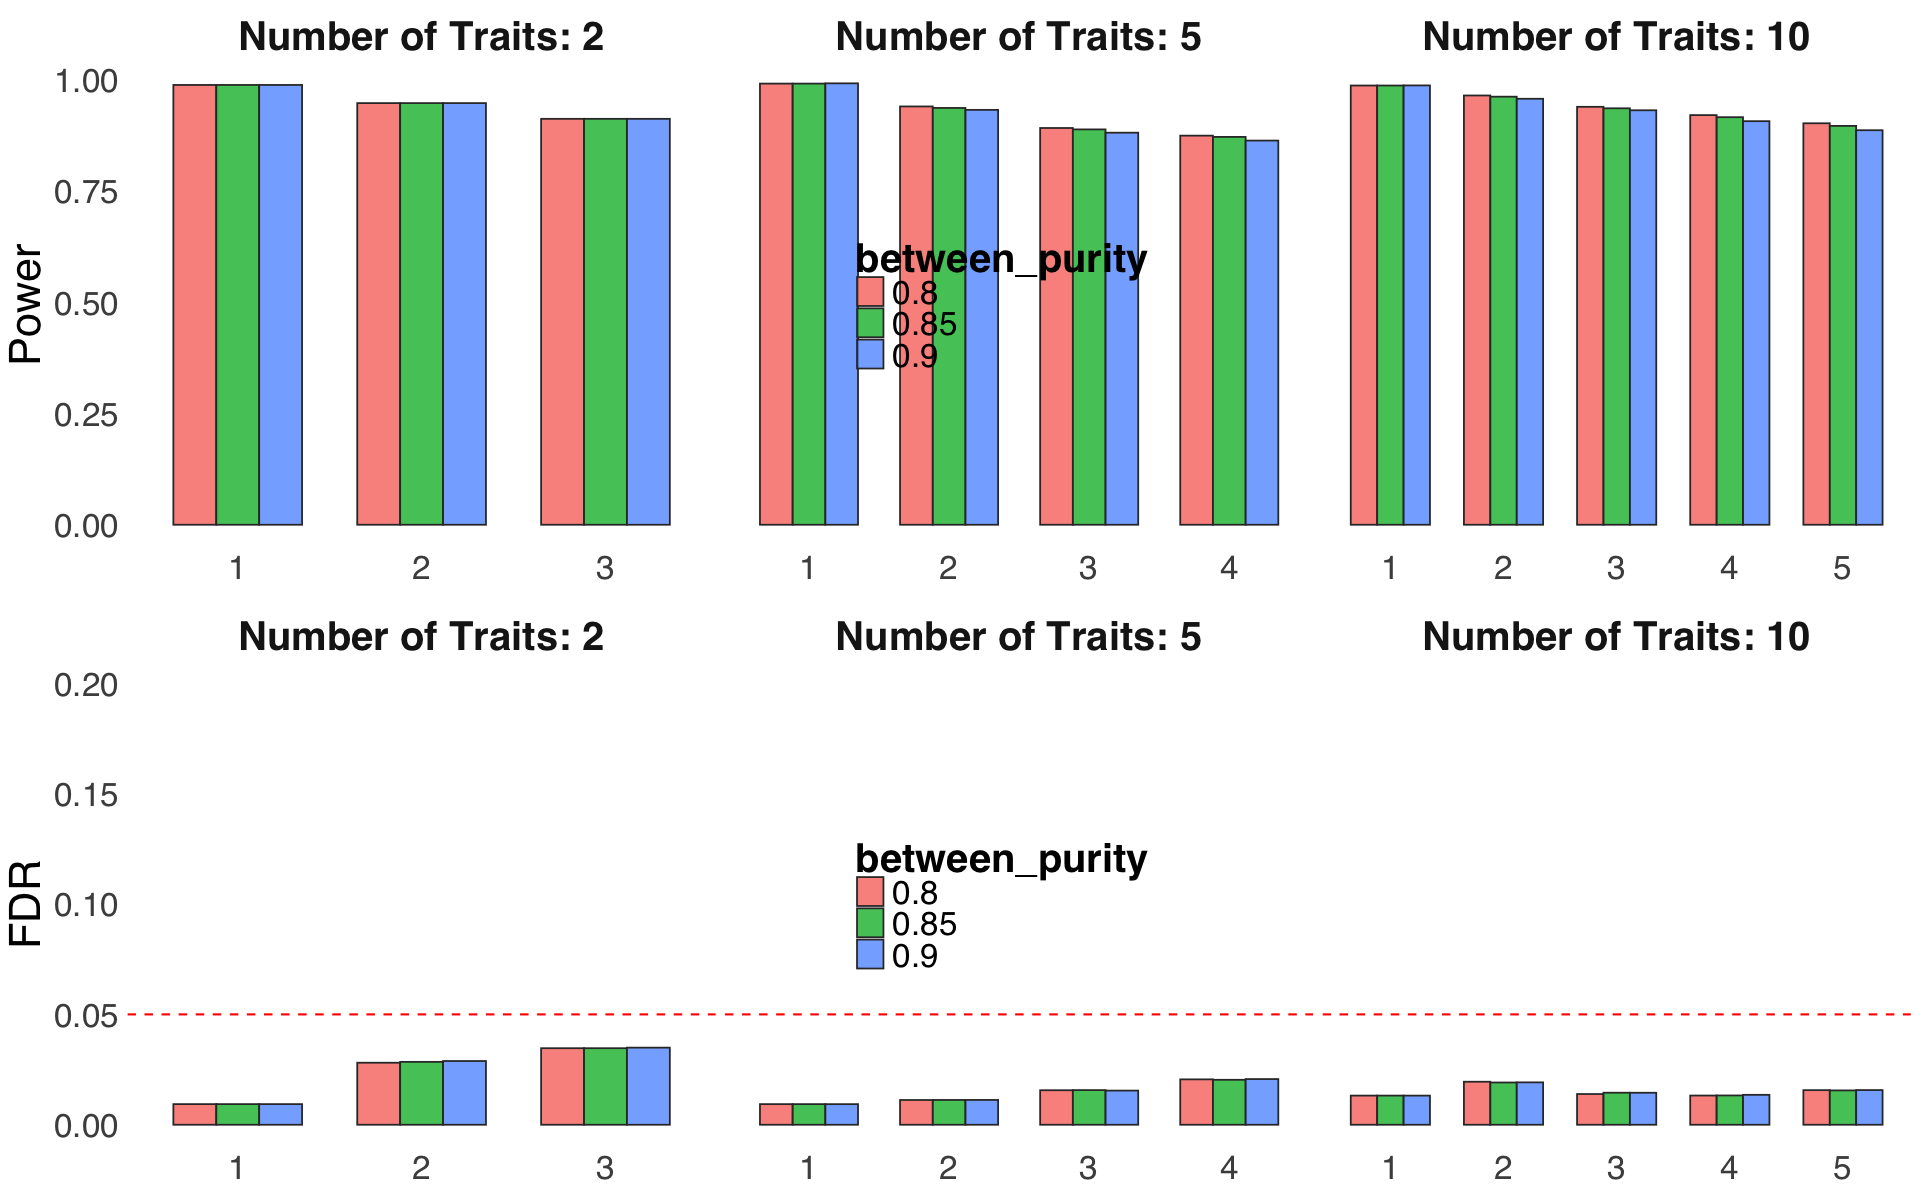

In [44]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)